## Notebook purpose
This notebook is used to prepare the data that will later be used in our analysis of the network in R.

In [244]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns

In [228]:
edges_filename = 'edge_df.csv'
edges_path = os.path.join('..', 'test_data', 'scraped-15.28 26-10-2023', edges_filename)

vertex_filename = 'vertex_df.csv'
vertex_path = os.path.join('..', 'test_data', 'scraped-15.28 26-10-2023', vertex_filename)

sentiment_filename = 'author_sentiments.csv'
sentiment_path = os.path.join('..', 'sentiment_analysis', sentiment_filename)

edge_data = pd.read_csv(edges_path)
vertex_data = pd.read_csv(vertex_path)
sentiment_data = pd.read_csv(sentiment_path)

### Prepare vertex data

In [234]:
vertex_data.head()

(1422, 7)

In [239]:
vertex_data = vertex_data[['author_id', 'member_since', 'subscriber_count', 'view_count', 'video_count']]

/var/folders/y7/_zszvpn176l12y354k0l6t6c0000gn/T/ipykernel_60100/786904754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertex_network_data['comment_count'] = vertex_network_data['author_id'].apply(lambda x: comment_count.loc[x])
/var/folders/y7/_zszvpn176l12y354k0l6t6c0000gn/T/ipykernel_60100/786904754.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['number_of_words'] = comments['text'].apply(lambda x: len(x.split()))
/var/folders/y7/_zszvpn176l12y354k0l6t6c0000gn/T/ipykernel_60100/7869

In [240]:
comment_count = edge_data['author_id'].value_counts()
vertex_data['comment_count'] = vertex_data['author_id'].apply(lambda x: comment_count.loc[x])

,id,subscriber_count,view_count,video_count,comment_count,average_length_comments,sentiment,comment_length_category,total_likes
0,0,0,0,0,1,31,no sentiment,long,2
1,1,514,143822,22,2,73,no sentiment,long,2
2,2,83,6113,35,1,8,no sentiment,short,0
3,3,0,0,0,4,19,negative,medium,0
4,4,0,0,0,1,14,no sentiment,medium,1
...,...,...,...,...,...,...,...,...,...
1417,1417,0,0,0,1,4,negative,short,1
1418,1418,3,0,0,2,9,negative,medium,44
1419,1419,2,0,0,2,26,no sentiment,medium,1
1420,1420,0,0,0,1,3,negative,short,4


In [218]:
comments = edge_data[['author_id', 'text', 'video_id']]
comments['number_of_words'] = comments['text'].apply(lambda x: len(x.split()))

comment_stats_per_user = comments[['author_id', 'number_of_words']].groupby(['author_id']).agg(['min','max','sum', 'mean', 'std'])
comment_stats_per_user.columns = ['_'.join(col) for col in comment_stats_per_user.columns.values]

comments['max_comment_length'] = 

In [241]:
comments['number_of_words'].describe()

In [242]:
sns.boxplot(comments, x='number_of_words', orient='v', hue='video_id')

,source,target,edge_weight
79,98,51,1
80,48,51,1
91,58,52,1
92,51,52,1
97,70,52,2
...,...,...,...
3544,648,1418,1
3545,446,1418,1
3546,446,607,1
3547,1418,446,1


In [243]:
comments['number_of_characters'].describe()

In [251]:
sns.boxplot(comments['number_of_characters'], orient='h')

In [253]:
# Number of words for each user
number_of_words = comments[['author_id', 'number_of_words']].groupby(['author_id']).agg(['min','max','sum', 'mean', 'std'])
number_of_words.columns = ['_'.join(col) for col in number_of_words.columns.values]
number_of_words['range'] = number_of_words['number_of_words_max'] - number_of_words['number_of_words_min']
number_of_words

'IGRAPH D--- 324 553 -- \n+ attr: average_length_comments (v), comment_count (v), comment_length_category (v), id (v), sentiment (v), subscriber_count (v), total_likes (v), video_count (v), view_count (v), edge_weight (e)'

,sender,receiver,edge_weight
79,UCC35EnAeuy4lLGTjIQHuLTQ,UCOtHqJeZ2OG0FrJRUOwaieg,1
80,UCEngHxSN_kcZYoavVA4i7Ow,UCOtHqJeZ2OG0FrJRUOwaieg,1
91,UCk7p83NSuNlDbT3eArf67Yw,UCEkx7zzpb9N6DAnz6v7Tz7A,1
92,UCOtHqJeZ2OG0FrJRUOwaieg,UCEkx7zzpb9N6DAnz6v7Tz7A,1
97,UCFPb9eToj2c4JlktoX6Ki5A,UCEkx7zzpb9N6DAnz6v7Tz7A,2
...,...,...,...
3544,UC-Zxxz-qjSnyQa24FG7AoYw,UC_seOXHxPhpYfwgRT8cGmYw,1
3545,UCJCXva9PVxXoibj9ZEFp_yA,UC_seOXHxPhpYfwgRT8cGmYw,1
3546,UCJCXva9PVxXoibj9ZEFp_yA,UCFatvcX_zapmWQ3nvOUbQHA,1
3547,UC_seOXHxPhpYfwgRT8cGmYw,UCJCXva9PVxXoibj9ZEFp_yA,1


<Axes: xlabel='edge_weight', ylabel='Count'>

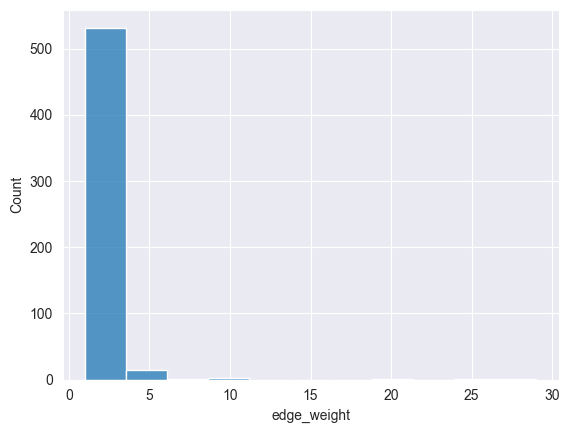

In [103]:
number_of_words['range'].describe()

In [104]:
sns.boxplot(number_of_words['number_of_words_mean'], orient='h')

count    553.000000
mean       1.444846
std        1.972900
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       29.000000
Name: edge_weight, dtype: float64

In [106]:
sns.boxplot(number_of_words['number_of_words_std'], orient='h')

553

In [99]:
sns.boxplot(number_of_words['number_of_words_'], orient='h')

,sender,receiver,edge_weight
0,UCIQCnEBCJ3lsMRv1ObUUiQg,NaN,0
1,UCOpY590f7hBsp2VTaMC0ssw,NaN,0
2,UC8_c_vHd4vcGLxvBmaRG96A,NaN,0
3,UCvxUmnDhwQ6m7JNnHdPTBuw,NaN,0
4,UC0nwTAHfYOVWuobiixgU5vA,NaN,0
...,...,...,...
3544,UC-Zxxz-qjSnyQa24FG7AoYw,UC_seOXHxPhpYfwgRT8cGmYw,1
3545,UCJCXva9PVxXoibj9ZEFp_yA,UC_seOXHxPhpYfwgRT8cGmYw,1
3546,UCJCXva9PVxXoibj9ZEFp_yA,UCFatvcX_zapmWQ3nvOUbQHA,1
3547,UC_seOXHxPhpYfwgRT8cGmYw,UCJCXva9PVxXoibj9ZEFp_yA,1


In [81]:
number_of_words

,number_of_words_min,number_of_words_max,number_of_words_sum,number_of_words_mean,number_of_words_std,range
author_id,,,,,,
UC-5bgCfB2-6P7IXYQVfkgQA,25,37,62,31.000000,8.485281,12
UC-5nRmjQKjUGxxcfzrNu01g,73,73,146,73.000000,0.000000,0
UC-6v21v6lHghRfplfKL8-Ig,8,8,8,8.000000,NaN,0
UC-7oRFgGO4t4MgHdIPwIexw,6,32,97,19.400000,11.480418,26
UC-8FXYpVJ7RiMUAyEXlmo-A,14,14,14,14.000000,NaN,0
...,...,...,...,...,...,...
UCzd9srmcKCSGk5y_Dcuo6xw,4,4,4,4.000000,NaN,0
UCzfKe--VK1RIKH4jaZGy99w,9,9,9,9.000000,NaN,0
UCzgT7Zp9Ka4tgQfdAQaI5lQ,26,26,26,26.000000,NaN,0


### Prepare edges data

In [9]:
edge_network_data = edge_data[['author_id', 'dest_id']].rename(columns={'author_id': 'sender', 'dest_id': 'receiver'})